# U.S. Medical Insurance Costs

Data from https://www.kaggle.com/datasets/mirichoi0218/insurance

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns

## Import and clean data

In [2]:
insurance = pd.read_csv('insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance['sex']=insurance['sex']=='female'
insurance['smoker']=insurance['smoker']=='yes'
insurance=insurance.rename({'sex':'female'},axis=1)
insurance=insurance.drop('region',axis=1)
insurance

,age,female,bmi,children,smoker,charges
0,19,True,27.900,0,True,16884.92400
1,18,False,33.770,1,False,1725.55230
2,28,False,33.000,3,False,4449.46200
3,33,False,22.705,0,False,21984.47061
4,32,False,28.880,0,False,3866.85520
...,...,...,...,...,...,...
1333,50,False,30.970,3,False,10600.54830
1334,18,True,31.920,0,False,2205.98080
1335,18,True,36.850,0,False,1629.83350
1336,21,True,25.800,0,False,2007.94500


In [4]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   female    1338 non-null   bool   
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   bool   
 5   charges   1338 non-null   float64
dtypes: bool(2), float64(2), int64(2)
memory usage: 44.6 KB


## How does the following cost predictor fare in this dataset?
insurance_cost=(250∗age)+(128∗female)+(370∗bmi)+(425∗children)+(24000∗smoker)−12500\
(Formula provided by Codecademy)

In [5]:
def calculate_total_error(db, agefactor, sexfactor, bmifactor, childrenfactor, smokerfactor, offset):
    charge_estimate = (db['age']*agefactor)+((db['female'])*sexfactor)+(db['bmi']*bmifactor)+(db['children']*childrenfactor)+((db['smoker'])*smokerfactor)+offset
    estimate_error = (db['charges']-charge_estimate)
    return round((estimate_error**2).mean()**.5,2)

In [6]:
calculate_total_error(insurance, 250, 128, 370, 425, 24000, -12500)

6119.45

The given formula has an average error of $6,119.45. Can it be improved?

In [7]:
corrs = insurance.corr()

<Axes: >

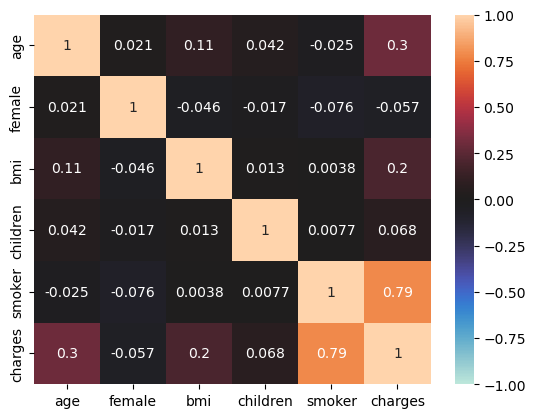

In [8]:
sns.heatmap(corrs, 
xticklabels=corrs.columns, 
yticklabels=corrs.columns,
vmax=1,center=0,vmin=-1,annot=True)

This heatmap shows that none of the variables are heavily correlated with each other, which allows them to be appropriately used together in multiple linear regression.

In [9]:
model = sm.OLS.from_formula('charges ~ age+female+bmi+children+smoker', data = insurance).fit()

In [10]:
model.params

Intercept        -12181.101839
female[T.True]      128.639854
smoker[T.True]    23823.392531
age                 257.734988
bmi                 322.364214
children            474.411121
dtype: float64

In [11]:
calculate_total_error(insurance, model.params[3], model.params[1], model.params[4], model.params[5], model.params[2], model.params[0])

6056.1

The new model lowers the average error from \\$6119.45 to \\$6056.10, an improvement of about \\$60, or 1%. However, the effort required in plugging in long, exact numbers may invalidate that gain. Can most of the gain be retained with more rounded figures?

In [12]:
calculate_total_error(insurance, 260, 130, 320, 475, 23800, -12200)

6056.21

With a loss of just 11 cents from the best model, the following model is recommended:\
insurance_cost=(260∗age)−(130∗male)+(320∗bmi)+(475∗children)+(23800∗smoker)−12200

This model is both more accurate and, in fact, a bit more rounded and easy to use than the original model.

The biggest differences between the old model and the new is that the new model increases the impact of bmi by about 15% and the impact of children by about 12%.

Despite the improvement, the model still has a large average error, often more than 100% of a client's total charges. More variables would be needed to achieve greater accuracy.

Note that this model will look significantly different depending on the data it is trained on. The old model could be more accurate for larger, more varied data.